In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

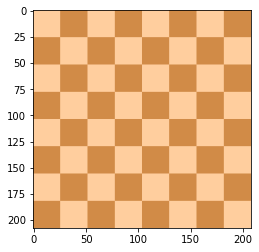

In [3]:
flat_chess = cv2.imread('data/flat_chess.jpg')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

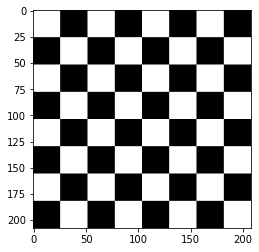

In [4]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess,cmap='gray')

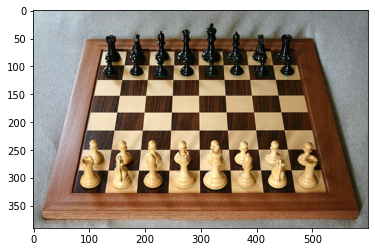

In [5]:
real_chess = cv2.imread('data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

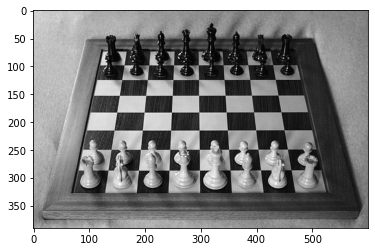

In [6]:
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess,cmap='gray')

In [7]:
gray_flat_chess

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [8]:
#they need to be floating values for corner detection

In [9]:
gray = np.float32(gray_flat_chess)

In [10]:
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04) #check doc with shift tab

In [11]:
dst = cv2.dilate(dst, None)

In [12]:
flat_chess[dst>0.01*dst.max()]=[255,0,0] #RGB this is for visualization

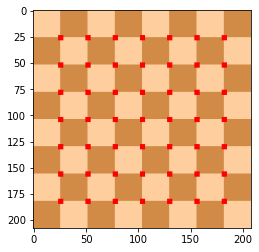

In [13]:
plt.imshow(flat_chess)

In [13]:
gray = np.float32(gray_real_chess)
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

In [14]:
dst = cv2.dilate(dst,None)

In [15]:
real_chess[dst>0.01*dst.max()] = [255,0,0]

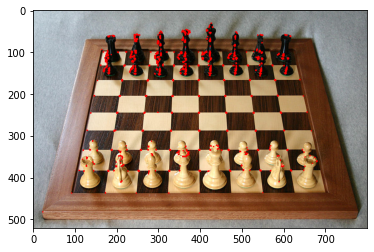

In [16]:
plt.imshow(real_chess)

In [17]:
# now let's check the SHRI TOMASI corner detection

In [18]:
#reload images 
real_chess = cv2.imread('data/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess = cv2.imread('data/flat_chess.jpg')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)

gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess = cv2.cvtColor(real_chess,cv2.COLOR_BGR2GRAY)

In [19]:
corners = cv2.goodFeaturesToTrack(gray_flat_chess,65,0.01,10)

In [20]:
corners 

array([[[182., 182.]],

       [[156., 182.]],

       [[130., 182.]],

       [[104., 182.]],

       [[ 78., 182.]],

       [[ 52., 182.]],

       [[ 26., 182.]],

       [[182., 156.]],

       [[156., 156.]],

       [[130., 156.]],

       [[104., 156.]],

       [[ 78., 156.]],

       [[ 52., 156.]],

       [[ 26., 156.]],

       [[182., 130.]],

       [[156., 130.]],

       [[130., 130.]],

       [[104., 130.]],

       [[ 78., 130.]],

       [[ 52., 130.]],

       [[ 26., 130.]],

       [[182., 104.]],

       [[156., 104.]],

       [[130., 104.]],

       [[104., 104.]],

       [[ 78., 104.]],

       [[ 52., 104.]],

       [[ 26., 104.]],

       [[182.,  78.]],

       [[156.,  78.]],

       [[130.,  78.]],

       [[104.,  78.]],

       [[ 78.,  78.]],

       [[ 52.,  78.]],

       [[ 26.,  78.]],

       [[182.,  52.]],

       [[156.,  52.]],

       [[130.,  52.]],

       [[104.,  52.]],

       [[ 78.,  52.]],

       [[ 52.,  52.]],

       [[ 26.,  

In [21]:
corners = np.int0(corners)

In [22]:
for i in corners:
    x,y = i.ravel()
    cv2.circle(flat_chess,(x,y),3,(255,0,0),-1)

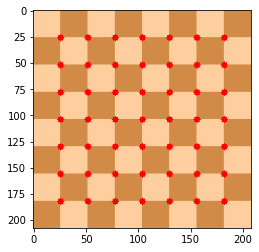

In [23]:
plt.imshow(flat_chess)

In [28]:
#now we run it on the real image
corners = cv2.goodFeaturesToTrack(gray_real_chess,100,0.01,10)

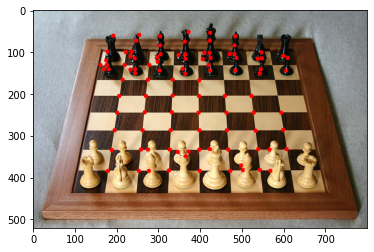

In [29]:
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess,(x,y),5,(255,0,0),-1)

plt.imshow(real_chess)
